# GRADIENT DESCENT 

Implementation of the gradient descent from scratch using vectorization.

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import copy, math

In [2]:
# Creating a databases of house price (@ChatGPT)

np.random.seed(0)  # for reproducibility

# Number of examples
N = 100

# Feature matrix
# Sizes | Bedrooms | Rooms | Age
X = np.random.randint(low=1, high=10, size=(N, 4))  # Random integers between 1 and 10
X = X * np.array([1000, 200, 50, 10])  # Scale each feature differently

# Weights for generating the prices
true_w = np.array([0.3, 0.5, 0.1, 0.05])

# Generate the prices
y = X @ true_w + np.random.normal(loc=0, scale=5, size=N)

In [3]:


# Weights
w = np.zeros((4))
# Biases
b = 0.

In [4]:
def gradient(X, y, w, b):
    N, D = X.shape
    djdw = np.zeros((D,))
    djdb = 0.
    
    f_wb = w @ X.T + b # Model f_wb(X)
    err = f_wb - y
    djdw = (err @ X) / N
    djdb = np.sum(err) / N
    
    return djdw, djdb

In [5]:
def grad_desc(X, y, w_init, b_init, gradient, learning_rate, num_iters):
    #Setting up the variables
    N, D = X.shape
    w = w_init
    b = b_init
    a = learning_rate
    J_history = []
    
    #Starting gradient descent:
    for i in range(num_iters):
        djdw, djdb = gradient(X, y, w, b)
        w = w - (a * djdw)
        b = b - (a * djdb)

        # compute cost function after updating w and b
        f_wb = w @ X.T + b
        J = np.sum((f_wb - y)**2) /(2*N)
        J_history.append(J)
        
#         if (i+1)%1000 == 0:
#             print(f"Iteration {i+1}: Cost function J = {J}")  # This will print the value of J at each iteration
    
    return J, J_history, f_wb, w, b

In [10]:
a = 0.000000022
num_iters = 1000 # use 1_000 for a beautiful convergence line, use 10_000 for efficient model (see R-squared)

J, J_hist, f_wb, w, b = grad_desc(X, y, w, b, gradient, a, num_iters)

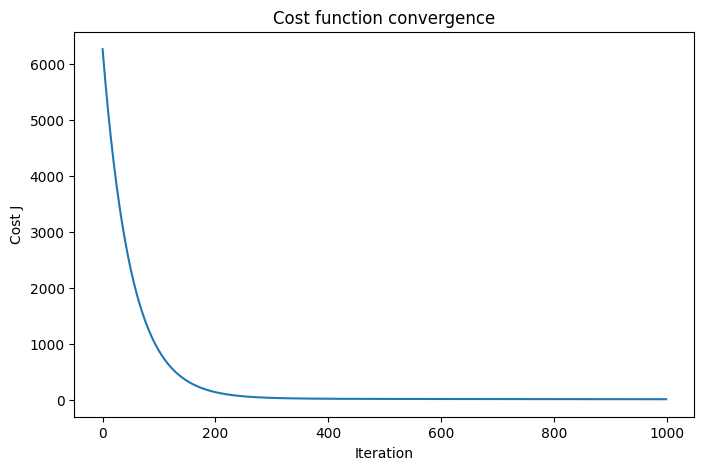

19.35557758471312

In [11]:
fig, ax = plt.subplots(figsize = (8, 5))

plt.title("Cost function convergence")
plt.plot(J_hist)
plt.xlabel('Iteration')
plt.ylabel('Cost J')
plt.show()
J

In [12]:
ss_res = np.sum((y - f_wb)**2)   # Sum of residual squares
ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
r2 = 1 - (ss_res / ss_tot)
print("R-squared:", r2*100)

R-squared: 99.99429759267237


In [13]:
w, b

(array([0.30058166, 0.50227328, 0.08405537, 0.01461519]),
 0.00028654762105623645)